# <span style="color:blue"> MBA em Ciência de Dados</span>
# <span style="color:blue">Técnicas Avançadas para Captura e Tratamento de Dados</span>

## <span style="color:blue">Análise de Componentes Principais -  Avaliação</span>
**Material Produzido por Luis Gustavo Nonato**<br>
**Cemeai - ICMC/USP São Carlos**
---

Os exercícios abaixo farão uso do conjunto de dados <font style="font-family: monaco">blobs2.csv</font> disponível no _moodle_.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Exercício 1)
Calcule as direções principais do conjunto de dados <font style="font-family: monaco">blobs2.csv</font>. Qual o número mínimo de direções principais necessárias para representar $75\%$ da variância contida nos dados?

a) 4<br>
b) 5<br>
c) 6<br>
d) 7

In [2]:
#Solucao
from sklearn.decomposition import PCA


In [5]:
df = pd.read_csv(r'blobs2.csv')
df.head()

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,-9.587828,-4.640974,-7.238876,-6.755609,-7.260508,-4.018110,-2.473796,-8.732220,2.967323,1.927218,...,-4.232223,4.621523,-7.881127,5.715173,-2.198992,-5.652042,2.294532,-11.305678,6.456732,-9.103836
1,4.430200,-7.408960,6.542226,-0.340267,-3.035140,-6.110085,5.947367,1.504693,0.159693,-10.043071,...,-1.490352,-1.379686,2.898314,-11.554418,3.995090,5.556163,-6.243226,-6.956367,-4.079177,-3.332520
2,1.687488,-4.747313,7.714434,0.466089,-1.147214,-3.827851,6.199882,-1.339071,2.281886,-10.378856,...,-1.600070,-2.524161,5.790805,-9.779573,3.976283,4.339449,-5.007315,-7.194471,-3.641903,-4.378965
3,0.580085,5.054813,1.156155,1.735212,0.433977,3.390672,-1.775347,7.299190,10.483092,-3.457759,...,-7.155131,-10.292705,6.859731,6.322292,7.500807,8.617424,4.512770,0.240015,6.106763,-7.057556
4,0.549273,-2.220818,10.625565,-7.102454,-5.502638,-7.016894,3.315088,-5.413384,-2.160280,-3.655956,...,-3.004390,5.946111,-7.085767,5.839948,-7.414791,9.395698,-2.193346,7.786570,0.974318,5.583822


In [7]:
pca_obj2 = PCA(svd_solver='full')
df_transformed = pca_obj2.fit_transform(df)

df_transformed

array([[-9.00177729, -6.5428215 , -3.72688268, ..., -0.53642261,
        -0.05930122, -0.85944674],
       [ 4.92491165,  4.12957062,  3.54462257, ..., -0.88393414,
        -0.42642563, -0.37673685],
       [ 8.77323388,  3.10933116,  4.09718222, ..., -0.4517334 ,
         0.81841065, -0.02049207],
       ...,
       [ 5.40532044,  3.93605463,  1.6116935 , ..., -0.1521821 ,
         0.26609103,  0.67332306],
       [ 6.29859936,  3.33535362,  3.63756076, ...,  1.75498365,
        -0.31612191,  0.52783574],
       [ 7.23920952,  3.7663038 ,  3.18013964, ..., -1.18258539,
         0.70158156,  0.64882969]])

In [13]:
df_transformed = pca_obj2.fit(df)

In [11]:
# Calculando o ângulo entre as direções principais com e
# sem outliers: cos(angulo) = np.dot(v1,v2)/(np.norm(v1)*np.norm(v2))
# angulo = arccos(np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2)))

v1 = X_transformed.components_[0] # direcao principal de maior variancia com outliers
v2 = X_no_outliers_transformed.components_[0] # direcao principal de maior variancia sem outliers

cos_comp = np.dot(v1,v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
ang = np.arccos(cos_comp)
print(ang)
print('angulo de ',ang*180/3.1415,' graus entre direcoes principais')

nan
angulo de  nan  graus entre direcoes principais


C:\Users\feh_s\AppData\Local\Temp\ipykernel_4236\4214577246.py:9: RuntimeWarning: invalid value encountered in arccos
  ang = np.arccos(cos_comp)


In [15]:
percentage_info = 0.0
num_components80 = 0
for i in range(df_transformed.explained_variance_ratio_.shape[0]):
    percentage_info += df_transformed.explained_variance_ratio_[i]
    if percentage_info >= 0.75:
        num_components80 = i+1
        break

print('Numero de componentes com no mínimo 75% da informacao: ', num_components80)
print('\nPorcentagem da informacao: ',percentage_info)

Numero de componentes com no mínimo 80% da informacao:  4

Porcentagem da informacao:  0.7583245900745526


### Exercício 2)
Faça o gráfico das variâncias em cada uma das direções principais. Qual a dimensão intrínseca dos dados, ou seja, quantas direções são necessárias para capturar $99\%$ da variância dos dados?

a) 5 <br>
b) 6<br>
c) 7<br>
d) 8

In [17]:
#Solucao
percentage_info = 0.0
num_components80 = 0
for i in range(df_transformed.explained_variance_ratio_.shape[0]):
    percentage_info += df_transformed.explained_variance_ratio_[i]
    if percentage_info >= 0.99:
        num_components80 = i+1
        break

print('Numero de componentes com no mínimo 75% da informacao: ', num_components80)
print('\nPorcentagem da informacao: ',percentage_info)

Numero de componentes com no mínimo 75% da informacao:  8

Porcentagem da informacao:  0.9968747546709391


### Exercício 3)
Existem _outliers_ nos dados originais. Utilize z-score com um threshold de 2.8 para identificar os outliers e removê-los dos dados. Quantos outliers foram identificados?

a) 3<br>
b) 4<br>
c) 5<br>
d) 6

In [18]:
#Solucao
from scipy.stats import zscore


In [19]:
z_score = zscore(df)

z_score

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,-1.752857,-0.573979,-1.492184,-1.082023,-1.064276,0.012174,-0.167030,-1.143207,-0.125331,1.407788,...,0.005922,0.128151,-0.240965,0.596674,-0.285851,-1.476854,0.446099,-1.234310,0.920860,-0.905620
1,1.118068,-1.209936,0.488562,0.628908,0.409507,-0.054213,0.104984,0.510571,-0.858758,-1.465846,...,1.080968,-0.077255,0.085177,-2.130482,0.715407,0.232870,-1.528923,-0.656443,-1.635958,0.093933
2,0.556354,-0.598411,0.657043,0.843958,1.068003,0.018212,0.113140,0.051160,-0.304385,-1.546456,...,1.037949,-0.116427,0.172692,-1.850204,0.712367,0.047269,-1.243022,-0.688078,-1.529842,-0.087304
3,0.329555,1.653667,-0.285573,1.182425,1.619513,0.247288,-0.144470,1.446675,1.837987,0.115050,...,-1.140106,-0.382324,0.205033,0.692548,1.282098,0.699841,0.959239,0.299698,0.835931,-0.551218
4,0.323245,-0.017939,1.075457,-1.174524,-0.451141,-0.082991,0.019958,-0.607048,-1.464796,0.067470,...,0.487337,0.173488,-0.216900,0.616378,-1.128972,0.818561,-0.592073,1.302364,-0.409593,1.638184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.603035,0.208033,0.677371,-1.248415,-1.024409,-0.104304,-0.007074,-0.553358,-0.838114,-0.311084,...,1.003547,0.168009,-0.300361,0.629529,-1.161308,0.629304,-0.264717,1.595694,-0.320014,1.360603
596,-1.572436,-0.350877,-1.503248,-0.098544,-0.991367,0.039344,-0.165732,-1.262811,-0.228583,1.497141,...,0.299677,0.113994,-0.207559,0.428270,-0.789992,-1.561229,0.346839,-0.808415,0.966077,-0.874732
597,0.922893,-0.881469,0.746760,0.803228,0.825367,-0.063872,0.049432,-0.248766,-0.520908,-1.436752,...,-0.060673,-0.073604,0.114100,-1.560592,0.528746,0.068936,-1.478722,-0.731765,-1.578039,0.319921
598,0.622478,-1.477509,0.847975,1.046514,1.289230,-0.026177,0.097224,0.213749,-0.373348,-1.496655,...,0.311564,-0.093205,0.103556,-1.855700,0.721494,-0.201406,-1.566894,-0.653309,-1.568062,-0.047248


In [22]:
df[np.abs(z_score) > 2.8].count().sum()


5

### Exercício 4)
Qual a porcentagem de variância explicada pelas duas primeiras componentes principais após a remoção dos outliers?

a) aproximadamente 90.1% <br>
b) aproximadamente  97.3% <br>
c) aproximadamente 80.6% <br>
d) aproximadamente 75.3% 

In [40]:
df_sem_outlier = df[np.abs(z_score) < 2.8].dropna()
df_sem_outlier

,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9,...,c15,c16,c17,c18,c19,c20,c21,c22,c23,c24
0,-9.587828,-4.640974,-7.238876,-6.755609,-7.260508,-4.018110,-2.473796,-8.732220,2.967323,1.927218,...,-4.232223,4.621523,-7.881127,5.715173,-2.198992,-5.652042,2.294532,-11.305678,6.456732,-9.103836
1,4.430200,-7.408960,6.542226,-0.340267,-3.035140,-6.110085,5.947367,1.504693,0.159693,-10.043071,...,-1.490352,-1.379686,2.898314,-11.554418,3.995090,5.556163,-6.243226,-6.956367,-4.079177,-3.332520
2,1.687488,-4.747313,7.714434,0.466089,-1.147214,-3.827851,6.199882,-1.339071,2.281886,-10.378856,...,-1.600070,-2.524161,5.790805,-9.779573,3.976283,4.339449,-5.007315,-7.194471,-3.641903,-4.378965
3,0.580085,5.054813,1.156155,1.735212,0.433977,3.390672,-1.775347,7.299190,10.483092,-3.457759,...,-7.155131,-10.292705,6.859731,6.322292,7.500807,8.617424,4.512770,0.240015,6.106763,-7.057556
4,0.549273,-2.220818,10.625565,-7.102454,-5.502638,-7.016894,3.315088,-5.413384,-2.160280,-3.655956,...,-3.004390,5.946111,-7.085767,5.839948,-7.414791,9.395698,-2.193346,7.786570,0.974318,5.583822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,1.915418,-1.237279,7.855870,-7.379517,-7.146209,-7.688512,2.478218,-5.081044,0.238721,-5.232845,...,-1.687812,5.786037,-9.844264,5.923229,-7.614834,8.155014,-0.778230,9.994316,1.343448,3.981101
596,-8.706876,-3.669927,-7.315858,-3.067935,-7.051476,-3.161962,-2.433611,-9.472571,2.572063,2.299423,...,-3.483009,4.207902,-6.777011,4.648765,-5.317762,-6.205166,1.865445,-8.100183,6.643058,-8.925494
597,3.477210,-5.979316,8.338646,0.313366,-1.842859,-6.414430,4.227577,-3.195618,1.453017,-9.921877,...,-4.402071,-1.273010,3.854278,-7.945613,2.840349,4.481488,-6.026215,-7.523279,-3.840510,-2.027688
598,2.010352,-8.573567,9.042850,1.225596,-0.512951,-5.226610,5.707149,-0.332638,2.017890,-10.171407,...,-3.452693,-1.845708,3.505753,-9.814376,4.032744,2.709242,-6.407370,-6.932783,-3.799395,-4.147688


In [49]:
df_transformed = PCA(n_components=2).fit(df_sem_outlier)

perc_exp = np.sum(df_transformed.explained_variance_ratio_[0:2])
print('Porcentagem de informacao 4 primeiras componentes principais: ',
      100*perc_exp,'%')

Porcentagem de informacao 4 primeiras componentes principais:  75.26760714065051 %


### Exercício 5)
Projete os dados sem outliers nas duas primeiras direções principais. Quantos clusters você consegue visualizar claramente na projeção dos dados?

a) 1 <br>
b) 2<br>
c) 3<br>
d) 4


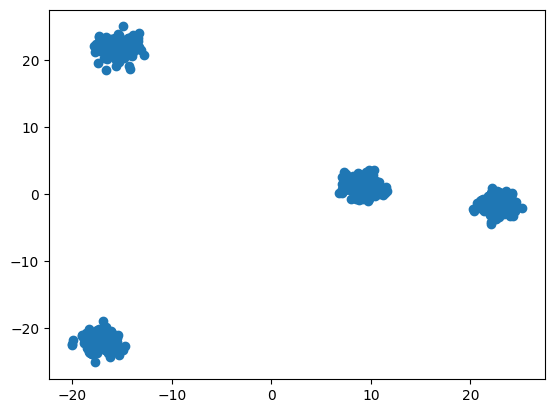

In [45]:
#Solucao
X2D_no_outliers = np.dot(df_sem_outlier,df_transformed.components_[0:2].T)

plt.scatter(X2D_no_outliers[:,0],X2D_no_outliers[:,1])

In [52]:
X2D_no_outliers[:,0]

array([], shape=(0, 2), dtype=float64)